In [26]:
# Find the most important Features using Grid Search

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Libraries for Data preprocessing
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#Libraries for machine learning Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Read Data 
df = pd.read_csv('train.csv')
df.info()
df.columns = ('id', 'purchase', 'day', 'month', 'duration', 'contactId', 'age',
       'gender', 'job', 'maritalStatus', 'education', 'creditFailure',
       'accountBalance', 'house', 'credit', 'contactType', 'numberOfContacts',
       'daySinceLastCampaign', 'numberOfContactsLastCampaign',
       'lastCampaignResult')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

,id,purchase,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31475,432184725,yes,30,nov,1628,69542367,58,female,technical,married,highSchool,no,3399,no,no,landline,2,188.0,8,success
31476,432147139,no,21,may,173,69542565,40,female,manager,single,secondarySchool,no,858,yes,no,unknown,1,NaN,0,unknown
31477,432166958,no,17,nov,422,69543453,51,female,worker,married,highSchool,no,1414,yes,no,unknown,3,186.0,2,failure
31478,432166312,no,29,aug,69,69544121,30,male,technical,married,uniGraduated,no,1,no,no,cellPhone,21,NaN,0,unknown


In [27]:
df.copy()
data=df.drop(["daySinceLastCampaign","lastCampaignResult","id","contactId"], axis=1)

In [28]:
purchase_new = {"purchase": {"yes": 1, "no": 0}}
data.replace(purchase_new, inplace=True)

In [29]:
# Select all Categorical Features
category = data.select_dtypes(include=["object"])

# Import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Apply OneHotEncoder to the categorical data
Cat_new = enc.fit_transform(category)

# Create a DataFrame from the encoded categories with appropriate column names
category_columns = enc.get_feature_names_out(input_features = category.columns)
category = pd.DataFrame(Cat_new, columns = category_columns)

# Select all Numerical Features
num = data.select_dtypes(exclude=["object"])

# Merge Categorical Feature and Numerical Feature
data1 = pd.concat([num, category], axis="columns")

# Replace null values with mean values
data1.fillna(data1.mean(), inplace=True)

/Users/jadennoh/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
X=data1.drop(['purchase'], axis=1)
y=data1['purchase']

In [31]:
# Making the data balanced
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X,y)

# We are spliting data to trian 70% and test 30%
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dtree_model.fit(x_train, y_train)

# Predict the labels of the test set
y_pred = dtree_model.predict(x_test)

print("Accuracy for Decision Tree Model: ", accuracy_score(y_test, y_pred))

Accuracy for Decision Tree Model:  0.9556635469162467


In [33]:
dtree_model.feature_importances_

array([7.60096930e-02, 3.64296134e-01, 5.61204151e-02, 7.41975655e-02,
       2.88550222e-02, 4.22403860e-02, 9.75499834e-03, 1.96117584e-02,
       2.08902647e-03, 1.28792473e-02, 6.58050217e-03, 2.37621223e-02,
       6.12206701e-03, 1.22200107e-02, 1.40012953e-02, 1.41618326e-02,
       1.27501359e-02, 5.01786452e-03, 2.30206148e-03, 2.66487958e-03,
       5.67910741e-03, 3.08912634e-03, 2.50392222e-03, 6.07413163e-03,
       1.76703170e-03, 3.81672908e-03, 4.52075523e-03, 2.63730664e-03,
       5.23563003e-03, 4.01439182e-03, 3.61594499e-04, 5.53140962e-03,
       4.86404836e-03, 5.41266863e-03, 4.60557320e-03, 5.69196229e-03,
       4.28577314e-03, 4.55917039e-03, 4.02667164e-03, 7.42476034e-04,
       9.15229249e-04, 3.69152474e-03, 3.50980630e-02, 5.31573359e-03,
       2.16810001e-03, 2.92909010e-03, 3.15831752e-03, 8.16674436e-02])

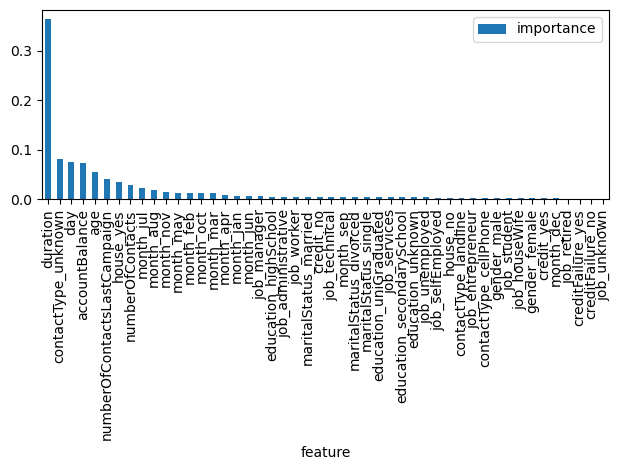

In [34]:
# Extract importance values for each feature (column of X)
importances = dtree_model.feature_importances_

# create a dataframe to store the values and their labels
df_feature = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df_feature = df_feature.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df_feature.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()